In [1]:
import numpy as np
from matplotlib.pyplot import *
from spectral import imshow, view_cube
import spectral.io.envi as envi
from skimage import io
from VCA import *
%matplotlib inline

In [2]:
find_index = lambda x, wvls: np.argmin(np.abs(wvls - x), axis = 0)

In [3]:
sample_image = io.imread(r'D:/Data/Data_HSI/CRAS-Dia2/Sample Images/santonio.jpeg')

In [4]:
fpath = r'D:/Data/Data_HSI/CRAS-Dia2/Transmitancia/'
fname_ref = r'2 -  Santo Antonio/conversion_output/post_processing/santo_antonio_dark_current_compensation_radiometric_correction'
fnam_white = r'1 - Referencia Branco/conversion_output/post_processing/ref_branco_dark_current_compensation_radiometric_correction'

In [5]:
ref = envi.open(fpath + fname_ref + '.hdr', fpath + fname_ref + '.img')
white = envi.open(fpath + fnam_white + '.hdr', fpath + fnam_white + '.img')
data_nparr = np.array(ref.load())[:, 360:630, :]
data_white = np.array(white.load())[250:900, 360:630, :].mean(axis = (0))

In [6]:
# corrected_nparr = data_nparr/data_white
corrected_nparr = data_nparr
bands = np.array(ref.bands.centers)

In [7]:
specim_fps = 1/(15e-3)
stage_speed = 10e-3

In [8]:
data_reg = corrected_nparr[150:1000]
y_size = data_reg.shape[0]/specim_fps*stage_speed * 1e2 #cm
x_size = 0.145 * 1e2 #cm

# Spectral Unmixing

In [15]:
data_total = data_reg.reshape(data_reg.shape[0]*data_reg.shape[1], -1).T
Ae, indice, Yp = vca(data_total, 5)

SNR estimated = 39.37170637024587[dB]
... Select the projective proj.


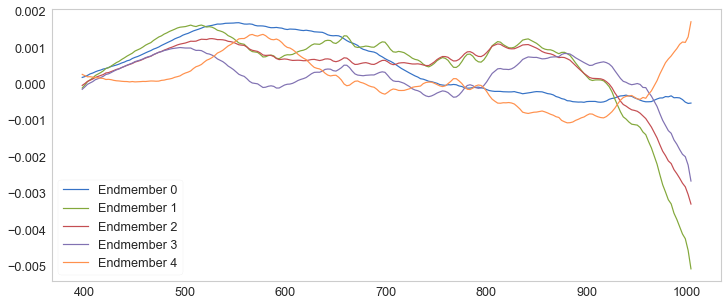

In [16]:
fig, ax = subplots(figsize = (12, 5))

for i in range(Ae.shape[1]):
    ax.plot(bands, Ae[:, i], label = 'Endmember ' + str(i))

ax.legend()
ax.grid(False)